# What are LightCurveFile objects?

In the previous tutorial we looked at `LightCurve` objects, which contain time and flux points. Now we will look at `LightCurveFiles`. Rather than being generated by you using a [Target Pixel File](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html), these files have been pregenerated using NASA's [Kepler Data Processing Pipeline](https://github.com/nasa/kepler-pipeline/).
Usually, you will access these files through the [MAST archive](https://archive.stsci.edu/kepler/data_search/search.php). 

We will demonstrate the difference between a `LightCurve` and a `LightCurveFile` using data from Kepler.

Kepler light curves from MAST have some level of processing (more details [here](https://arxiv.org/pdf/1207.3093.pdf)) and allow you to access the two kinds of flux; the **SAP** flux and the **PDCSAP** flux. SAP flux is Simple Aperture Photometry flux, the same as we made in the [previous tutorial](http://lightkurve.keplerscience.org/tutorials/1.03-what-are-lightcurves.html). PDCSAP is the Pre-search Data Conditioning SAP flux. Long term trends have been removed from this data using so-called Cotrending Basis Vectors (CBVs). PDCSAP flux is usually slightly cleaner data than the SAP flux and will have fewer long term trends.

We can read in a light curve file from the Kepler mission using `KeplerLightCurveFile`. We can use the `search_lightcurvefile()` function to fetch them from the data archive:

In [1]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile(6922244, quarter=4).download()

`lcf` is now a `KeplerLightCurveFile` object. In this case it contains two `KeplerLightCurve` objects, one for the SAP flux and one for the PDCSAP flux. The `plot` method on a `KeplerLightCurveFile` object will plot up both of these.

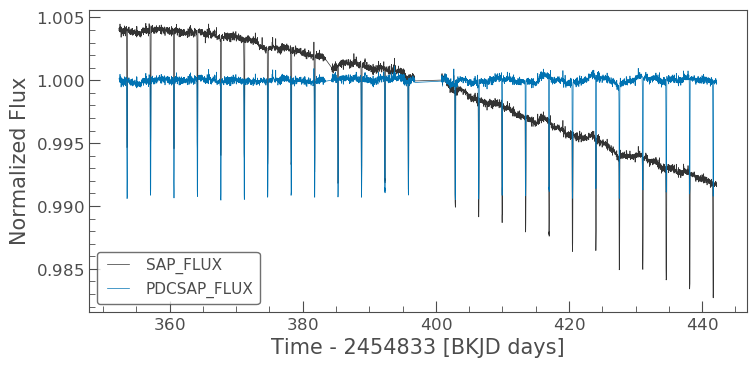

In [2]:
lcf.plot();

We can see that the PDCSAP flux is flatter. To work more with this data we must choose which type of flux we want to work with. Let's choose PDCSAP flux:

In [3]:
pdcsap = lcf.PDCSAP_FLUX

You can choose SAP flux in a similar way using
  
    sapflux = lcf.SAP_FLUX

In [4]:
lcf

KeplerLightCurveFile(ID: 6922244)

In [5]:
pdcsap

KeplerLightCurve(ID: 6922244)

This has created a `KeplerLightCurve` object. The only flux it contains is the PDCSAP flux. This has the same methods we used in the [previous tutorial](http://lightkurve.keplerscience.org/tutorials/what-are-lightcurves.html). For example you can check the meta data and the CDPP noise metric:

In [6]:
pdcsap.mission

'Kepler'

In [7]:
pdcsap.quarter

4

In [8]:
pdcsap.estimate_cdpp()

408.6913767647017